## Setting



https://dacon.io/competitions/open/235698/talkboard/404315

### install

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv] #] 생략 가능
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose    

### 구글 드라이브 연결

구글 드라이브와 연결하는 코드를 실행해줍니다. 구글 드라이브의 파일을 불러올 수 있습니다.

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### (현재 위치 설정)

In [ ]:
# 태양광 발전량 data 파일이 저장된 경로를 현재 위치로 설정
%cd '/content/drive/MyDrive/태양광'

/content/drive/MyDrive/태양광


### 라이브러리 import

In [ ]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd
import numpy as np

# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트를 사용하기 위한 코드
plt.rc('font', family='NanumBarunGothic')

# [연암공대] 태양광 발전량 예측 AI 경진대회  

In [ ]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd

# train 데이터 불러오기
train = pd.read_csv('./train.csv')

# test 데이터 불러오기
test = pd.read_csv('./test.csv')

# sample_submission 불러오기
sample_submission = pd.read_csv('./sample_submission.csv')
'''
train = (train
 .assign( SUN = lambda df: train['DHI'] + train['DNI'] )
 )

test = (test
    .assign( SUN = lambda df: test['DHI'] + test['DNI'] )
 )
 '''

"\ntrain = (train\n .assign( SUN = lambda df: train['DHI'] + train['DNI'] )\n )\n\ntest = (test\n    .assign( SUN = lambda df: test['DHI'] + test['DNI'] )\n )\n "

In [ ]:
test.head()

,ID,DHI,DNI,WS,RH,T
0,1,0.300661,0.500871,4.272917,0.005448,-0.556057
1,2,0.595151,0.761307,4.385417,-1.171177,0.909985
2,3,0.069508,0.535166,1.795833,0.866136,-0.970577
3,4,0.758707,0.406851,3.597917,0.263797,-0.171982
4,5,0.098751,0.772563,2.279167,-0.915363,-0.783224


In [ ]:
'''
train = (train
 .assign( SS = lambda df: train['SUN'] + train['T'] )
 )

test = (test
    .assign( SS = lambda df: test['SUN'] + test['T'] )
 )
 '''

"\ntrain = (train\n .assign( SS = lambda df: train['SUN'] + train['T'] )\n )\n\ntest = (test\n    .assign( SS = lambda df: test['SUN'] + test['T'] )\n )\n "

In [ ]:

train = (train
 .assign( DRH = lambda df: train['DNI'] +  ( -1 * train['RH'] ) )
 )

test = (test
 .assign( DRH = lambda df: test['DNI'] +  ( -1 * test['RH'] ) )
 )
'''
train = (train
 .assign( DNIT = lambda df: train['DNI'] +  ( train['T'] ) )
 )

test = (test
 .assign( DNIT = lambda df: test['DNI'] +  ( test['T'] ) )
 )
 '''

"\ntrain = (train\n .assign( DNIT = lambda df: train['DNI'] +  ( train['T'] ) )\n )\n\ntest = (test\n .assign( DNIT = lambda df: test['DNI'] +  ( test['T'] ) )\n )\n "

In [ ]:
for i in train.columns:
  print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


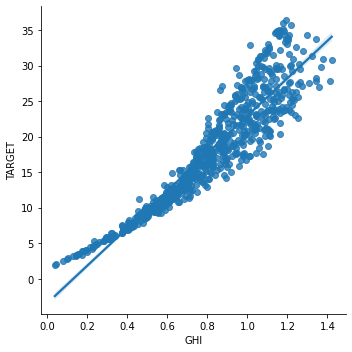

In [ ]:
train_df = (train
 .assign(GHI = lambda df: df['DHI'] + df['DNI'])
 )

sns.lmplot(data=train_df, x='GHI', y='TARGET')
plt.show()

DHI DNI


<Figure size 720x360 with 0 Axes>

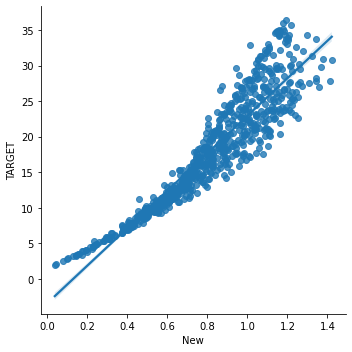

DHI WS


<Figure size 720x360 with 0 Axes>

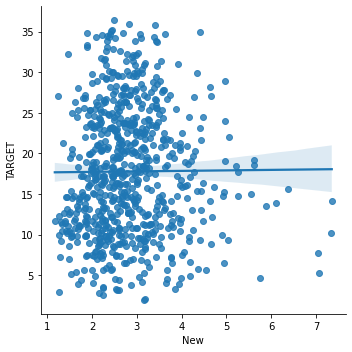

DHI RH


<Figure size 720x360 with 0 Axes>

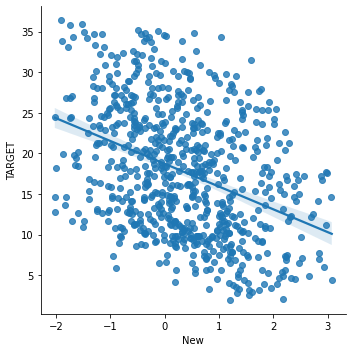

DHI T


<Figure size 720x360 with 0 Axes>

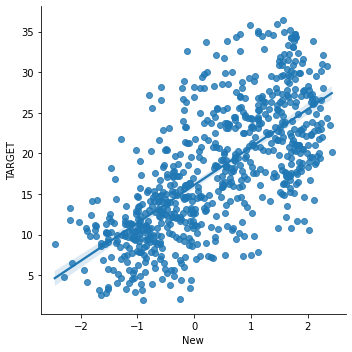

DHI DRH


<Figure size 720x360 with 0 Axes>

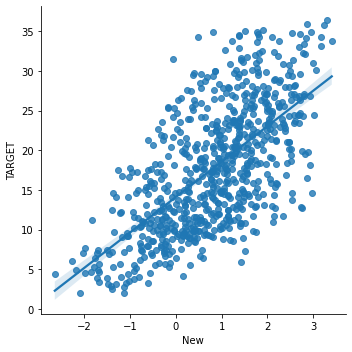

DNI DHI


<Figure size 720x360 with 0 Axes>

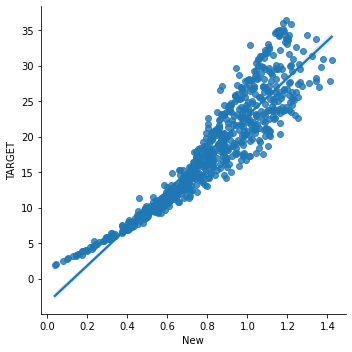

DNI WS


<Figure size 720x360 with 0 Axes>

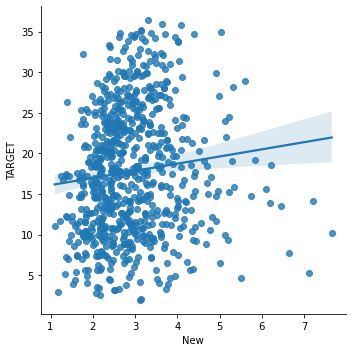

DNI RH


<Figure size 720x360 with 0 Axes>

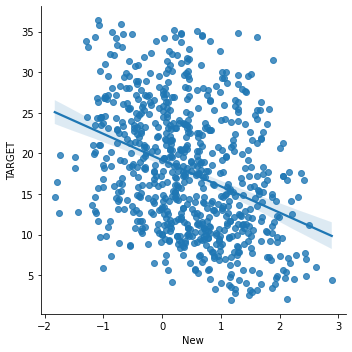

DNI T


<Figure size 720x360 with 0 Axes>

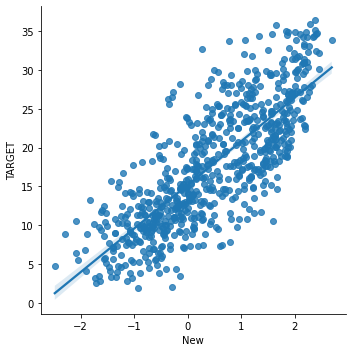

DNI DRH


<Figure size 720x360 with 0 Axes>

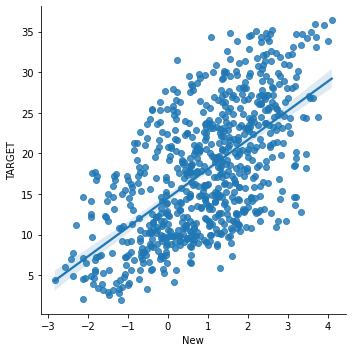

WS DHI


<Figure size 720x360 with 0 Axes>

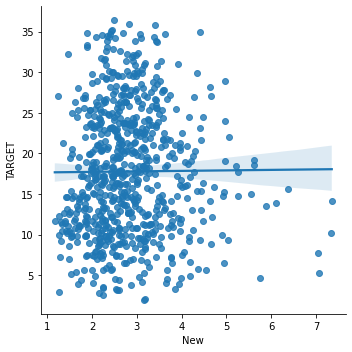

WS DNI


<Figure size 720x360 with 0 Axes>

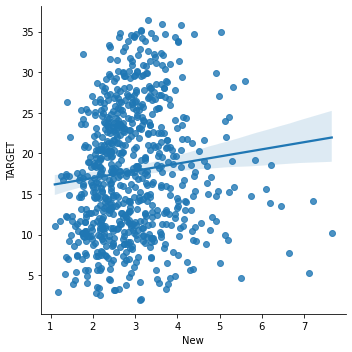

WS RH


<Figure size 720x360 with 0 Axes>

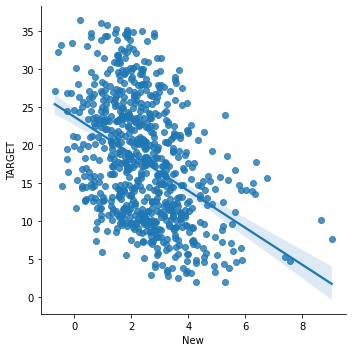

WS T


<Figure size 720x360 with 0 Axes>

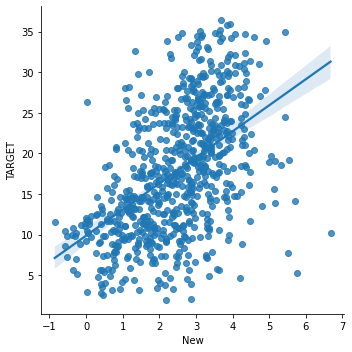

WS DRH


<Figure size 720x360 with 0 Axes>

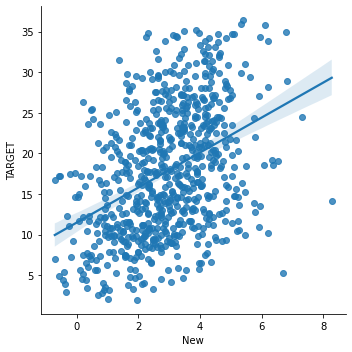

RH DHI


<Figure size 720x360 with 0 Axes>

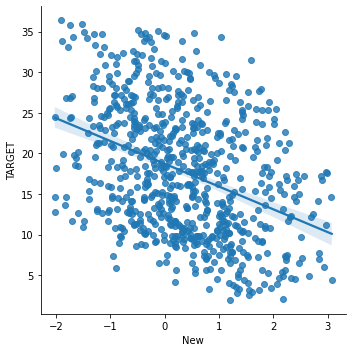

RH DNI


<Figure size 720x360 with 0 Axes>

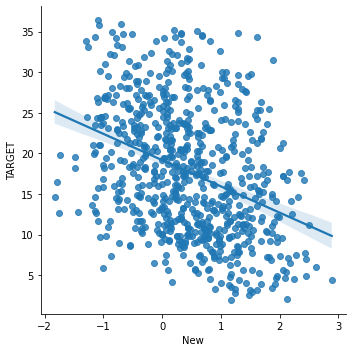

RH WS


<Figure size 720x360 with 0 Axes>

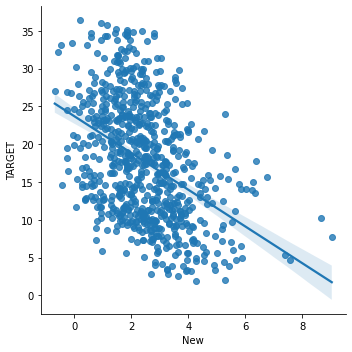

RH T


<Figure size 720x360 with 0 Axes>

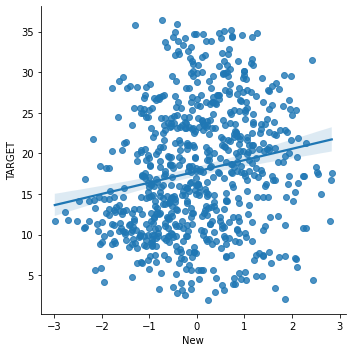

RH DRH


<Figure size 720x360 with 0 Axes>

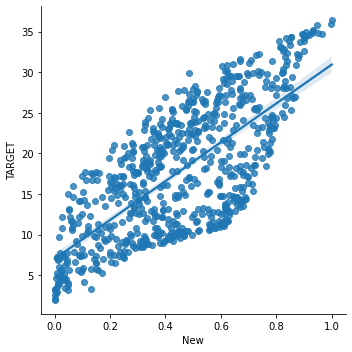

T DHI


<Figure size 720x360 with 0 Axes>

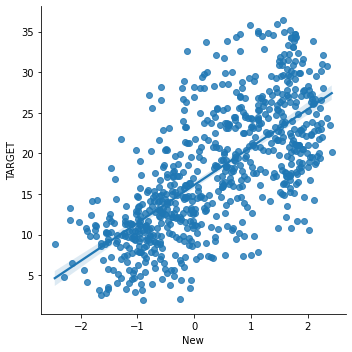

T DNI


<Figure size 720x360 with 0 Axes>

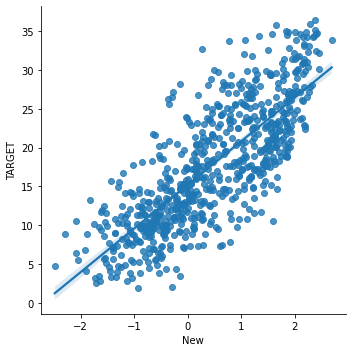

T WS


<Figure size 720x360 with 0 Axes>

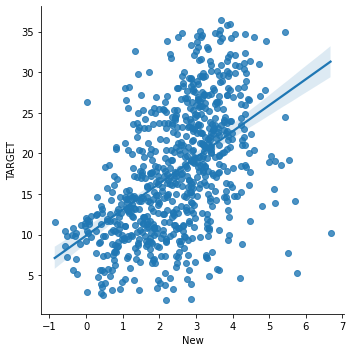

T RH


<Figure size 720x360 with 0 Axes>

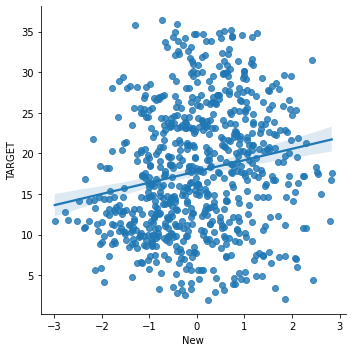

T DRH


<Figure size 720x360 with 0 Axes>

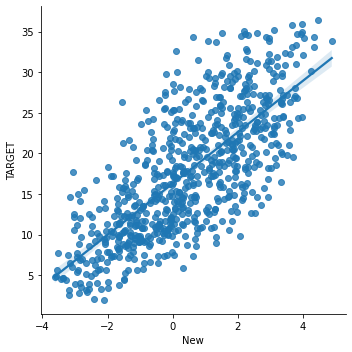

DRH DHI


<Figure size 720x360 with 0 Axes>

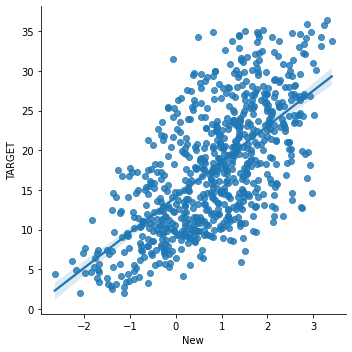

DRH DNI


<Figure size 720x360 with 0 Axes>

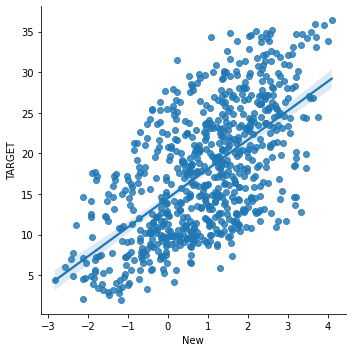

DRH WS


<Figure size 720x360 with 0 Axes>

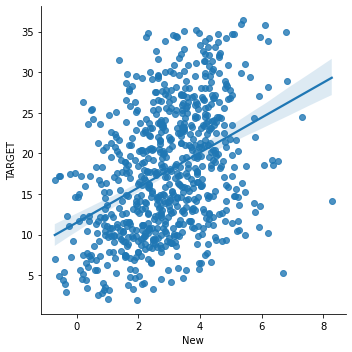

DRH RH


<Figure size 720x360 with 0 Axes>

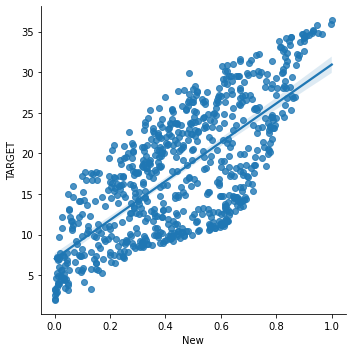

DRH T


<Figure size 720x360 with 0 Axes>

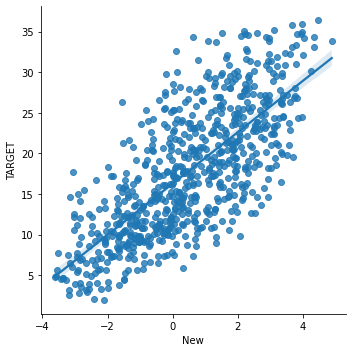

In [ ]:
for i in train.columns:
  for j in train.columns:
    if i is not j and i!='ID' and j!='ID' and i!='TARGET' and j!='TARGET':
      train_df=train.assign(New=lambda df: df[i]+df[j])
      plt.figure(figsize=(10, 5))
      print(i+' '+j)
      sns.lmplot(data=train_df,x='New',y='TARGET')
      plt.show()

In [ ]:
c=243.12
b=17.62
gamma=(b*(train['T'])/(c+(train['T'])))+np.log(train['RH']/100)
dp=(c*gamma)/(b-gamma)
train['Td']=dp

gamma=(b*(test['T'])/(c+(test['T'])))+np.log(test['RH']/100)
dp=(c*gamma)/(b-gamma)
test['Td']=dp

In [ ]:

train = (train
 .assign( SUN = lambda df: train['DHI'] + train['DNI'] )
 )

test = (test
    .assign( SUN = lambda df: test['DHI'] + test['DNI'] )
 )


train = (train
 .assign( DNIT = lambda df: train['DNI'] + train['T'] )
 )

test = (test
    .assign( DNIT = lambda df: test['DNI'] + test['T'] )
 )

In [ ]:
for i in train.columns:
  for j in train.columns:
    if i is not j and i!='ID' and j!='ID' and i!='TARGET' and j!='TARGET':
      train_df=train.assign(New=lambda df: df[i]+df[j])
      plt.figure(figsize=(10, 5))
      print(i+' '+j)
      sns.lmplot(data=train_df,x='New',y='TARGET')
      plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

train = (train
 .assign( SS = lambda df: train['SUN'] + train['T'] )
 )

test = (test
    .assign( SS = lambda df: test['SUN'] + test['T'] )
 )


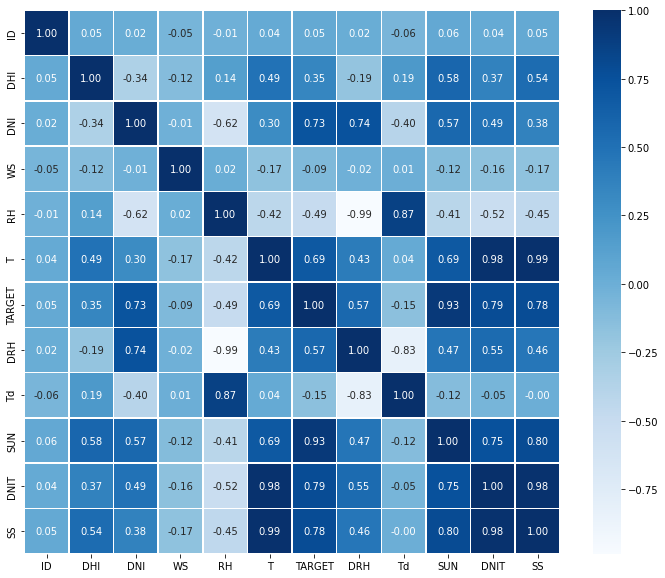

In [ ]:
import pandas as pd
import numpy as np

# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(data = train.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')


In [ ]:
train = train.drop(columns=['ID','WS','Td','RH'])
test = test.drop(columns=['ID','WS','Td','RH'])

In [ ]:
x_train = train.drop(columns=['TARGET'])
y_train = train['TARGET']

In [ ]:
x_train.columns

Index(['DHI', 'DNI', 'T', 'DRH', 'SUN', 'DNIT', 'SS'], dtype='object')

DHI
DNI
T
TARGET
DRH
SUN
DNIT
SS


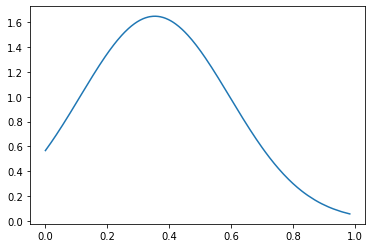

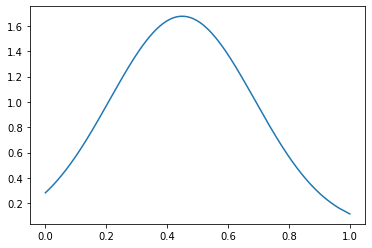

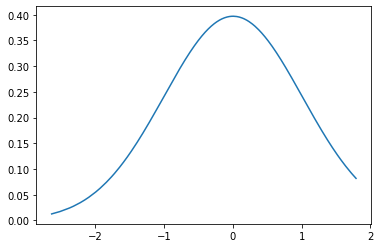

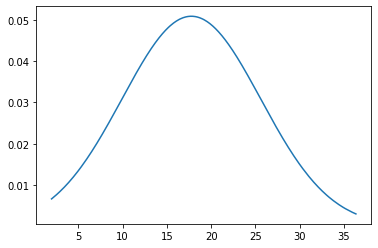

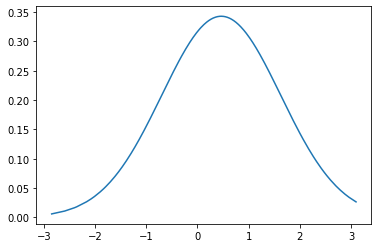

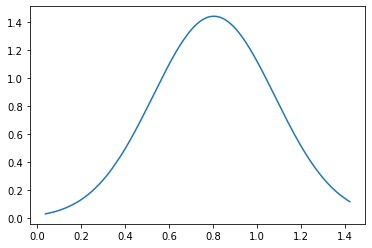

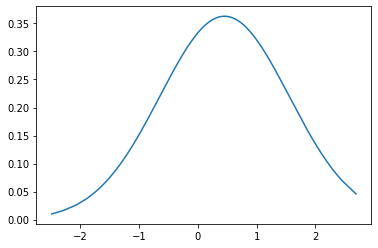

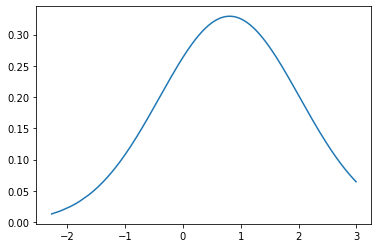

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

for i in train.columns:
  data_mean=np.mean(train[i])
  data_std=np.std(train[i])
  pdf = stats.norm.pdf(np.sort(train[i]), data_mean, data_std)
  plt.figure()
  print(i)
  plt.plot(np.sort(train[i]), pdf)

In [ ]:
for i in train.columns:
  s_ol_data = pd.Series(train[i])
  level_1q = s_ol_data.quantile(0.25)
  level_3q = s_ol_data.quantile(0.75)
  IQR = level_3q - level_1q
  rev_range = 3  # 제거 범위 조절 변수
  dff = s_ol_data[(s_ol_data <= level_3q + (rev_range * IQR)) & (s_ol_data >= level_1q - (rev_range * IQR))]
  dff = dff.reset_index(drop=True)

DHI
DNI
T
TARGET
DRH
SUN
DNIT
SS


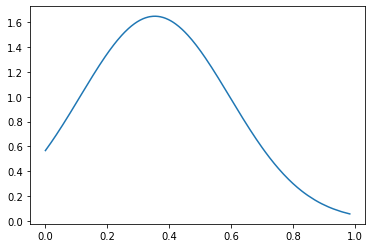

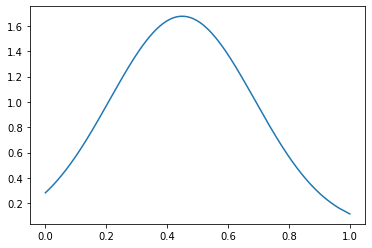

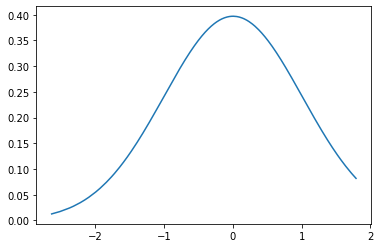

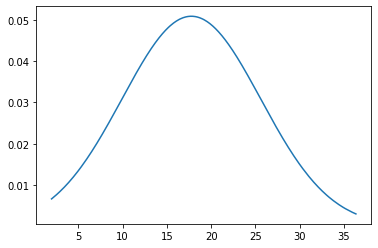

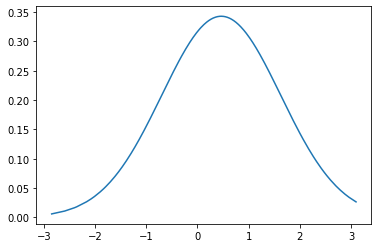

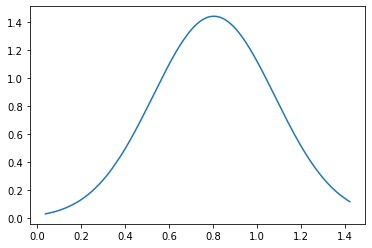

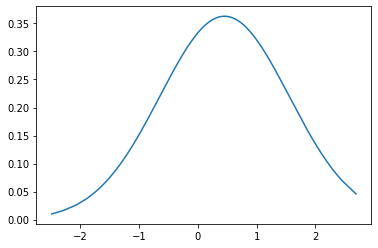

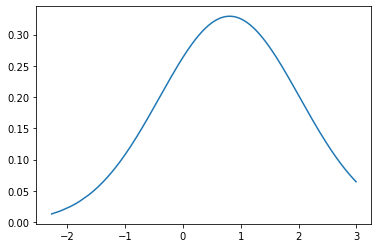

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

for i in train.columns:
  data_mean=np.mean(train[i])
  data_std=np.std(train[i])
  pdf = stats.norm.pdf(np.sort(train[i]), data_mean, data_std)
  plt.figure()
  print(i)
  plt.plot(np.sort(train[i]), pdf)

In [ ]:
import numpy
#,'n_estimators':[i for i in range(10,250,10)],'max_depth':[i for i in range(3,11)],,'reg_lambda':[i for i in range(1,15)]
param_grid={'learning_rate':np.arange(0.01,0.2,0.001),'min_child_weight':[i for i in range(0,15,2)],'n_estimators':[i for i in range(10,250,10)],
            'gamma':[i for i in range(10)],'max_depth':[i for i in range(3,11)],'reg_lambda':[i for i in range(1,15)],
 
            'subsample':np.arange(0.5,0.9,0.001),'colsample_bytree':numpy.arange(0.5,0.9,0.001),'reg_alpha':[i for i in range(1,10)]}

In [ ]:

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
model=XGBRegressor()
folds = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
gcv=RandomizedSearchCV(model, param_distributions=param_grid, cv=folds,  n_jobs=-1)

In [ ]:
gcv.fit(x_train, y_train)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력

[03:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
final params {'subsample': 0.7200000000000002, 'reg_lambda': 6, 'reg_alpha': 2, 'n_estimators': 80, 'min_child_weight': 6, 'max_depth': 3, 'learning_rate': 0.1119999999999999, 'gamma': 6, 'colsample_bytree': 0.8710000000000003}


In [ ]:
model=XGBRegressor(metric='mse',boosting='gbtree',learning_rate=gcv.best_params_['learning_rate'],n_estimators=gcv.best_params_['n_estimators'],max_depth=gcv.best_params_['max_depth'],
                   min_child_weight=gcv.best_params_['min_child_weight'],gamma=gcv.best_params_['gamma'],subsample=gcv.best_params_['subsample'],
                   reg_lambda=gcv.best_params_['reg_lambda'],
                    colsample_bytree=gcv.best_params_['colsample_bytree'],reg_alpha=gcv.best_params_['reg_alpha'])

model

XGBRegressor(boosting='gbtree', colsample_bytree=0.8710000000000003, gamma=6,
             learning_rate=0.1119999999999999, metric='mse', min_child_weight=6,
             n_estimators=80, reg_alpha=2, reg_lambda=6,
             subsample=0.7200000000000002)

In [ ]:
# 모델 학습
model.fit(x_train,y_train)

[03:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(boosting='gbtree', colsample_bytree=0.8710000000000003, gamma=6,
             learning_rate=0.1119999999999999, metric='mse', min_child_weight=6,
             n_estimators=80, reg_alpha=2, reg_lambda=6,
             subsample=0.7200000000000002)

In [ ]:
# 예측 결과값을 prediction 변수에 저장
prediction = model.predict(test)

In [ ]:
# sample_submission.csv 정답파일 불러오기
sample_submission = pd.read_csv('./sample_submission.csv')

# 예측된 값을 정답파일과 병합
sample_submission['TARGET'] = prediction

# 정답파일 데이터프레임 확인
sample_submission.head()

,ID,TARGET
0,1,16.645954
1,2,31.199175
2,3,11.124709
3,4,23.289829
4,5,21.498611


In [ ]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv('submission.csv',index = False)

In [ ]:
#catboost?ㅌ휴ㅐㅐㄴㅅ?


In [ ]:
'''
# 분석할 의미가 없는 칼럼을 제거합니다.
train = train.drop(columns=['ID','WS'])
test = test.drop(columns=['ID','WS'])

c=243.12
b=17.62
gamma=(b*(train['T'])/(c+(train['T'])))+np.log(train['RH']/100)
dp=(c*gamma)/(b-gamma)
train['Td']=dp

gamma=(b*(test['T'])/(c+(test['T'])))+np.log(test['RH']/100)
dp=(c*gamma)/(b-gamma)
test['Td']=dp

# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
x_train = train.drop(columns=['TARGET'])

y_train = train['TARGET']
'''

"\n# 분석할 의미가 없는 칼럼을 제거합니다.\ntrain = train.drop(columns=['ID','WS'])\ntest = test.drop(columns=['ID','WS'])\n\nc=243.12\nb=17.62\ngamma=(b*(train['T'])/(c+(train['T'])))+np.log(train['RH']/100)\ndp=(c*gamma)/(b-gamma)\ntrain['Td']=dp\n\ngamma=(b*(test['T'])/(c+(test['T'])))+np.log(test['RH']/100)\ndp=(c*gamma)/(b-gamma)\ntest['Td']=dp\n\n# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.\nx_train = train.drop(columns=['TARGET'])\n\ny_train = train['TARGET']\n"

과적합 제어

1. 복잡성 직접 제어:  max_depth, min_child_weight,gamma

2. 무작위성을 추가해 노이즈에 강인한 훈련: subsample, colsample_bytree/ 학습률의 크기, eta를 줄일 수도 있음=> num_round 늘리기!!!


https://zzinnam.tistory.com/entry/XGBoost-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%EC%A1%B0%EC%A0%95%ED%8A%9C%EB%8B%9D


http://www.kwangsiklee.com/2018/06/bayesianoptimization%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC-xgboost-%ED%95%98%EC%9D%B4%ED%8D%BC-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0%EB%A5%BC-%EC%B5%9C%EC%A0%81%ED%99%94/

In [ ]:

  # MAPE Metric
  def mean_absolute_percentage_error(y_test, y_pred):
      y_test, y_pred = np.array(y_test), np.array(y_pred)
      return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

  # 탐색 대상 함수 (XGBRegressor)
  def XGB_cv(max_depth,learning_rate, n_estimators, gamma
             ,min_child_weight, subsample
             ,colsample_bytree, silent=True, nthread=-1):

      # 모델 정의
      model = xgb.XGBRegressor(max_depth=int(max_depth),
                                learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                gamma=gamma,
                                min_child_weight=min_child_weight,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree, 
                                nthread=nthread
                                )
      # 모델 훈련
      model.fit(X_train, y_train)

      # 예측값 출력
      y_pred= model.predict(X_test)

      # 각종 metric 계산
      rmse = np.sqrt(mean_squared_error(y_test, y_pred))
      r2 = r2_score(y_test, y_pred)
      mape = mean_absolute_percentage_error(y_test, y_pred)

      # 오차 최적화로 사용할 metric 반환
      return r2
      

In [ ]:

import pandas as pd

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb

from sklearn.metrics import r2_score

import numpy as np

from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

#from bayes_opt import BayesianOptimization

# 경고 끄기
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
# 모델 선언

model=XGBRegressor(boosting_type='gbdt', gamma=2, learning_rate=0.081, max_depth=9,
             metric='mse', min_child_weight=5, n_estimators=210,
             subsample=0.6210000000000001) 


In [ ]:
'''
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import itertools

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization
'''

"\nimport warnings\nwarnings.filterwarnings('ignore')\nimport numpy as np\nimport pandas as pd   \nimport matplotlib.pyplot as plt\nimport seaborn as sns\ncolor = sns.color_palette()\nimport itertools\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.model_selection import KFold, StratifiedKFold\nfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report \nfrom sklearn.metrics import precision_recall_curve, average_precision_score \nfrom sklearn.metrics import roc_curve, auc, roc_auc_score\n\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom bayes_opt import BayesianOptimization\n"

In [ ]:
from lightgbm.callback import early_stopping
                    #max_depth=gcv.best_params_['max_depth'],#n_estimators=gcv.best_params_['n_estimators'],

model=XGBRegressor(boosting_type='gbdt', gamma=2, learning_rate=0.081, max_depth=9,
             metric='mse', min_child_weight=5, n_estimators=210,
             subsample=0.6210000000000001) 
'''
                   learning_rate=gcv.best_params_['learning_rate'],
                   min_child_weight=gcv.best_params_['min_child_weight'],gamma=gcv.best_params_['gamma'],subsample=gcv.best_params_['subsample'],
                   #reg_lambda=gcv.best_params_['reg_lambda']
                    colsample_bytree=gcv.best_params_['colsample_bytree'],reg_alpha=gcv.best_params_['reg_alpha'])
'''

model

XGBRegressor(boosting_type='gbdt', gamma=2, learning_rate=0.081, max_depth=9,
             metric='mse', min_child_weight=5, n_estimators=210,
             subsample=0.6210000000000001)

https://velog.io/@highway92/XGBoost-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0%EB%93%A4


https://goldenrabbit.co.kr/2022/07/14/%ED%99%95%EC%8B%A4%ED%9E%88-%EC%95%8C%EC%95%84%EB%91%90%EB%A9%B4-%EB%A7%8C%EC%82%AC%EA%B0%80-%ED%8E%B8%ED%95%B4%EC%A7%80%EB%8A%94-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-10%EA%B0%80%EC%A7%80-%EC%95%8C/
